# Natural disasters, Climate change and Economic development

In this project we have explored how the financial situation in a country affects the number of poleple affected by droughts and heat waves.

## 1. Motivation

### 1.1 What is your dataset?

We first decided we wanted to analyze and visualize the effect of natural disasters, especially droughts and heatwaves; the dataset on the impact of natural disasters from 1900 was obtained from [EM-DAT](https://public.emdat.be/). A database about natular disasters created by [Centre for Research on the Epidemiology of Disasters - CRED of the School of Public Health Université catholique de Louvain](https://www.emdat.be/about) .  A database about natular disasters created by [Centre for Research on the Epidemiology of Disasters - CRED of the School of Public Health Université catholique de Louvain](https://www.emdat.be/about). It is known that natural disasters are getting more frequent with climate change, but we wanted to look into how natural disasters affected different countries based on how developed their economy os and their economic indicators. Therefore we also used economic and social data, such as GDP, agriculture data, income data, and water and energy use. We also used population data to normalize and visualize our data. The economic and social data came from the [world bank](https://www.worldbank.org/en/home?cid=ECR_GA_worldbank_EN_EXTP_search&gclid=Cj0KCQjwpPKiBhDvARIsACn-gzC8rOGW4jJO-dzt-ybEEgC5tuAsyht8pYRufY2TLFj_lEpbnRNLXlUaAjGzEALw_wcB). One other dataset that we have used is data that have to do with energy consumption from the research site [OurWorldInData](https://ourworldindata.org/energy). 

### 1.2 Why did you choose this/these particular dataset(s)?

The dataset about the effect of disasters from 1900 was our main interest, motivation and gave us the idea for the project.Also the wirld bank financial indicators are collected from a trustworhty organizations. The population data was used to normalize and in some of the visualizations. We chose the specific economic indicators because a drought or a heatwave should affect some of them like fresh water withdrawal or the cerial yield of a country. Moreover, we wanted to check the assumption that the financial situation both in country level but also in personal level results in droughts and heatwave affecting more poeple. Therefore, checking the distribution of the GDP in each category (agriculture, intustry, exports etc.) which have to do with each countrys economy but also GDP per capita and distrubution of income which give some intuition about the personal level would give us a better analisys of the situation.

### 1.3 What was your goal for the end user´s experience?

We wanted to tell the story of how natural disasters do not discriminate. Instead, they exacerbate existing inequalities, hitting countries with limited economic resources the hardest in an interactive and exploratory way. Give the reader a better insight into how natural disasters affect less economically developed countries and that the impact of climate change is also a server equity case. 

Comment from Evangelos: Basically we have seen that there is a discrimination. Countries with better economy less inequallity and not in the "west world" are affected more than prosperous "west" countries. And basically that was my personal intention.

## 2. Basic stats 

### importing needed python modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim
import missingno as msno
import plotly.graph_objs as go

### 2.1 Data preperation and cleaning 

In [2]:
# Opening file from local directory
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

The dataset has the following columns

In [3]:
Natural_Disasters.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

Dis No, Seq, Event Name and Glide are columns that have to do with the identification of each Disaster incident. It seems that each row corresponds to a different disaster. 
Disaster Group , Disaster subGroup, Disaster Subtype, Disaster SubSubType are fields that have to do with the categorization of the disaster.We have dowloaded only the Natural disasters but the database has also technological disasters like train accidents. We have decided initialy to check on the Disaster subtype because it seemed  not extremely specific and at the same time not extremly general and check how many there were through time, how many have died and affected from them and how high the cost of the damages were.

In [4]:
Natural_Disasters['Disaster Type'].unique()

array(['Drought', 'Industrial accident', 'Earthquake',
       'Volcanic activity', 'Mass movement (dry)',
       'Miscellaneous accident', 'Storm', 'Flood', 'Transport accident',
       'Epidemic', 'Landslide', 'Wildfire', 'Extreme temperature', 'Fog',
       'Complex Disasters', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

In [5]:

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]


### Counting the number of the each type of natural disasters in the whole dataset

In [6]:
# by value_count we get a sorted array of the number of raws of ecah natural disaster subtype 
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

17

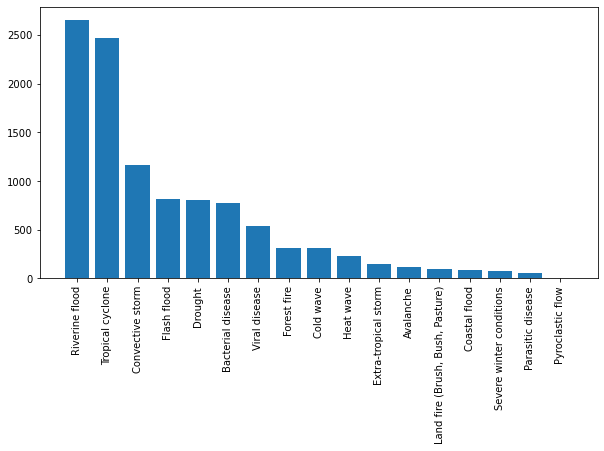

In [7]:

plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

From the above diagram it seems that the Riverine floods and Tropical cyclone related disasters are very frequent. However we need to check more things.

### Now we need to check what happens through the decades 

In [8]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
#Categories

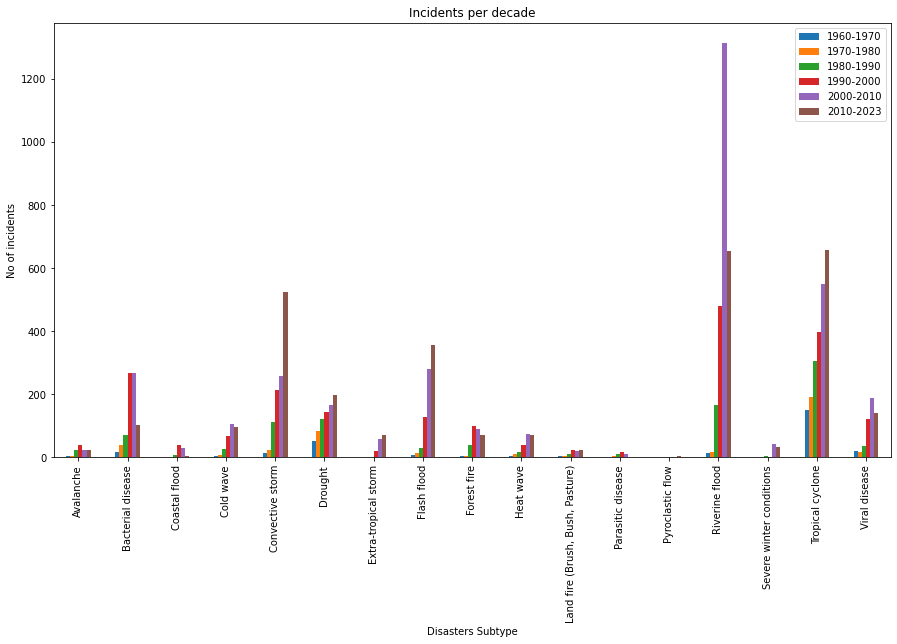

In [9]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)]['Disaster Subtype'].value_counts(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)]['Disaster Subtype'].value_counts(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)]['Disaster Subtype'].value_counts(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)]['Disaster Subtype'].value_counts(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)]['Disaster Subtype'].value_counts(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)]['Disaster Subtype'].value_counts()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('Incidents per decade')
plt.xlabel('Disasters Subtype')
plt.ylabel('No of incidents')
plt.show()



In most of the natural disasters their frequency increases each decade

### Try to find a way to determine the location of a soecific natural disaster

In [10]:
location_name = 'Chikoma'
country = 'ZMB'

# geocode the location using geopandas
geolocator = Nominatim(user_agent='natural_disaster_analysis')
location = geolocator.geocode('1600 Pennsylvania Avenue NW, Washington, DC 20500')

# extract the latitude and longitude from the result
latitude = location.latitude
longitude = location.longitude

print(f'The latitude and longitude of {location_name} in {country} are ({latitude}, {longitude}).')

The latitude and longitude of Chikoma in ZMB are (38.897699700000004, -77.03655315).


### Frequency Mapping 

We have made some plotting at the world map. Based on the previous observation that the natural disasters become more frequent throughout the years. For that reason we have made two dataframes. One for before 2000 and one for after 2000 with the same maximum value in order to visualize the difference.

In [11]:
# counting based on ISO (country code) and Disaster Subtype.
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
# filtering before 2000
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
#filtering after 2000
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()


In [12]:
# when we use group by the parameters of the call are used as an index 
# by using reset_index we ensure that the indexes become again columns

Disaster_Country = Disaster_Country.reset_index()

In [13]:
# Getting only the Drought data
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


C:\Users\asmun\AppData\Local\Temp\ipykernel_37140\1005535292.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


In order to make the process easier we have automated the map plotting with a function

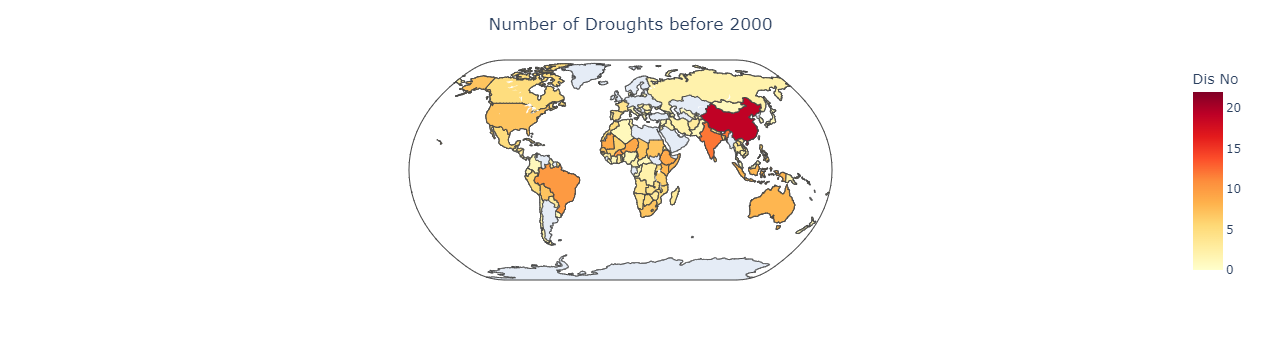

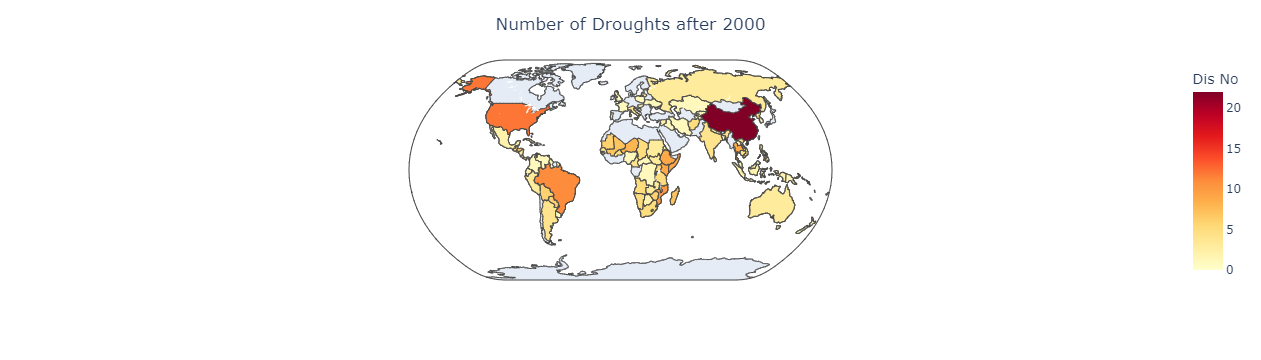

In [14]:
# a function that gets the type of disaster and the colour to be used as input and pro


def mapping(DF_After = Disaster_Country_After_1980 , DF_Before = Disaster_Country_Before_1980, subtype = 'Drought',colour = 'YlOrRd',Value = 'Dis No' ):
    """
        A function that gets the subtype of a disaster and the colour to be used as input and plots it in two maps before 
        and after 2000 using in both map as maximum, the maximum of both of them
    
    
    """
    # get the common maximum between the timeframe before and after 2000
    maximum_After = DF_After[DF_After['Disaster Subtype']==subtype][Value].max()
    
    maximum_Before = DF_Before[DF_Before['Disaster Subtype']==subtype][Value].max()
    
    maximum = max(maximum_After,maximum_Before)
    
    
    Droughts =  DF_Before[ DF_Before['Disaster Subtype']==subtype]

    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth', color_continuous_scale = 'YlOrRd',range_color=[0, maximum])
    
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's before 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()

    Droughts = DF_After[DF_After['Disaster Subtype']==subtype]


    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, maximum])
    
        
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's after 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()


    
mapping()

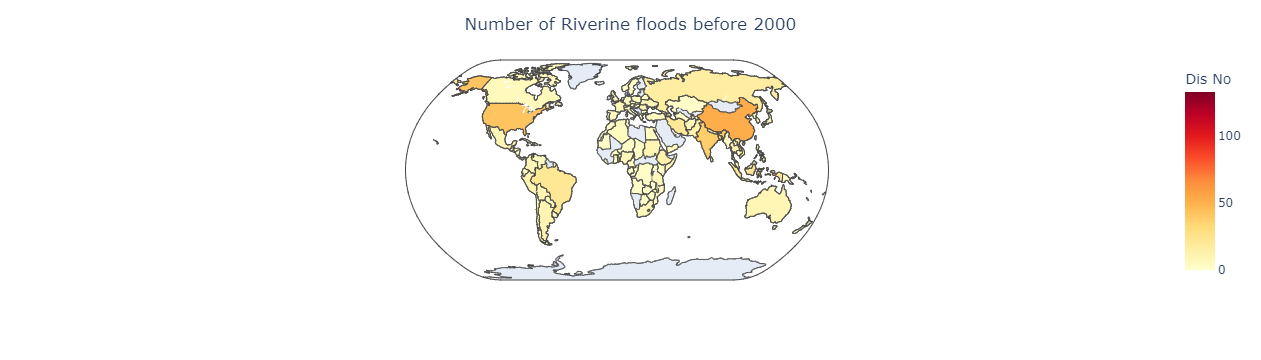

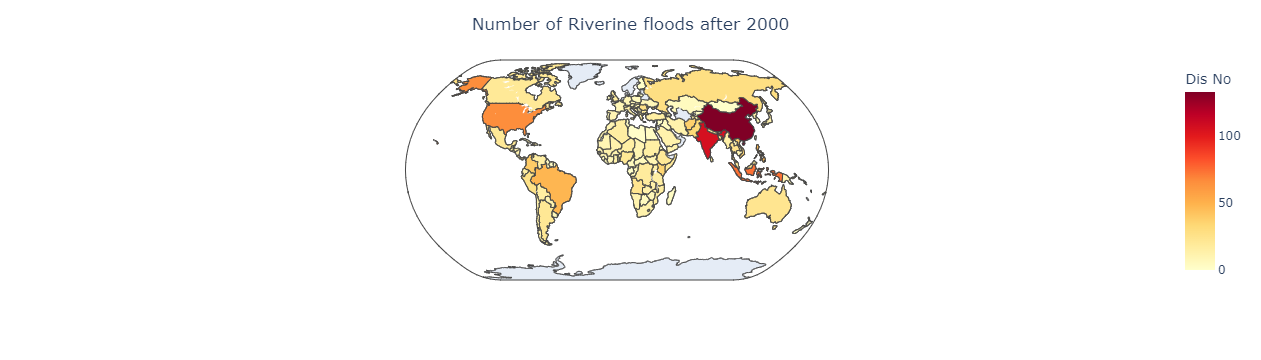

In [15]:
mapping(subtype= 'Riverine flood')

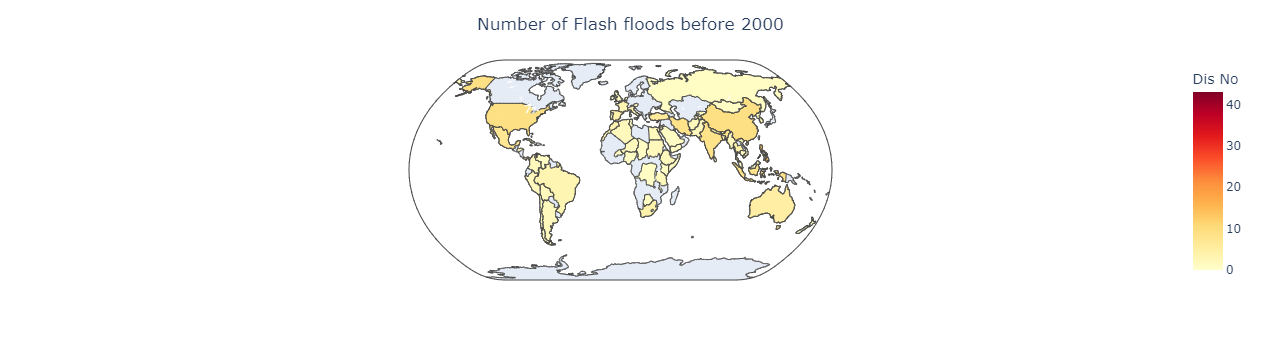

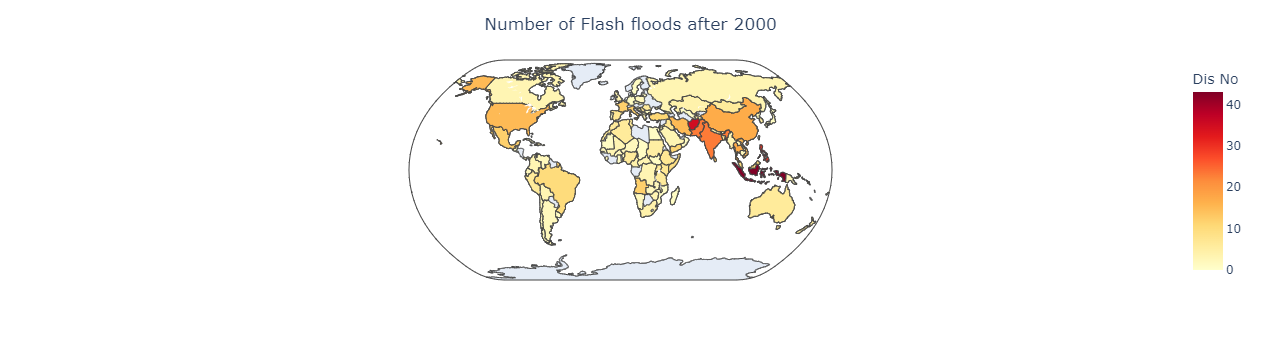

In [16]:
mapping(subtype= 'Flash flood')

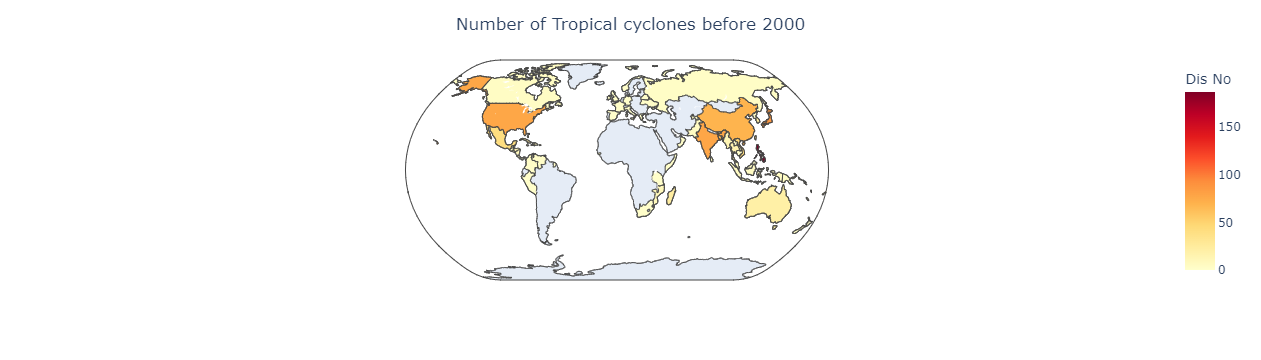

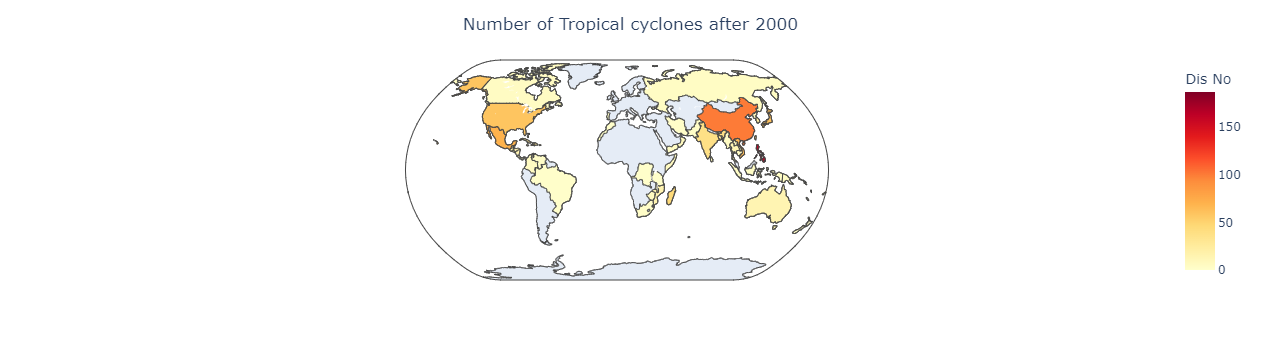

In [17]:
mapping(subtype= 'Tropical cyclone')

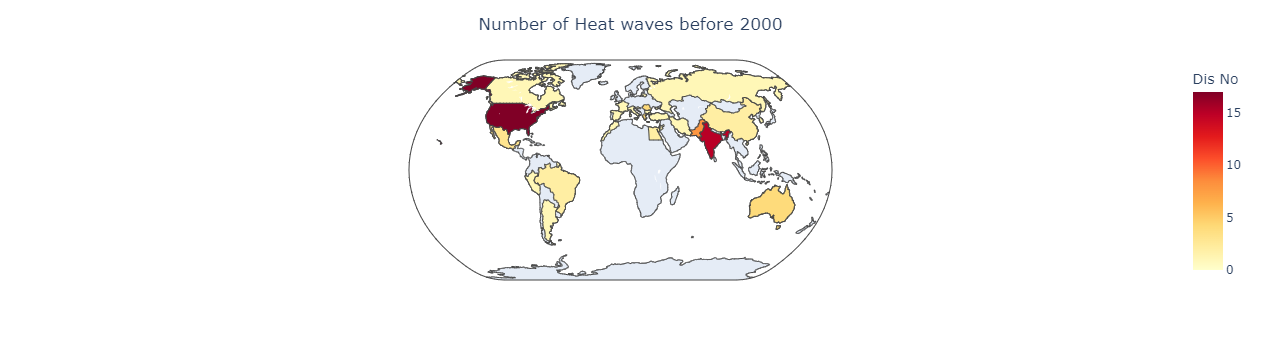

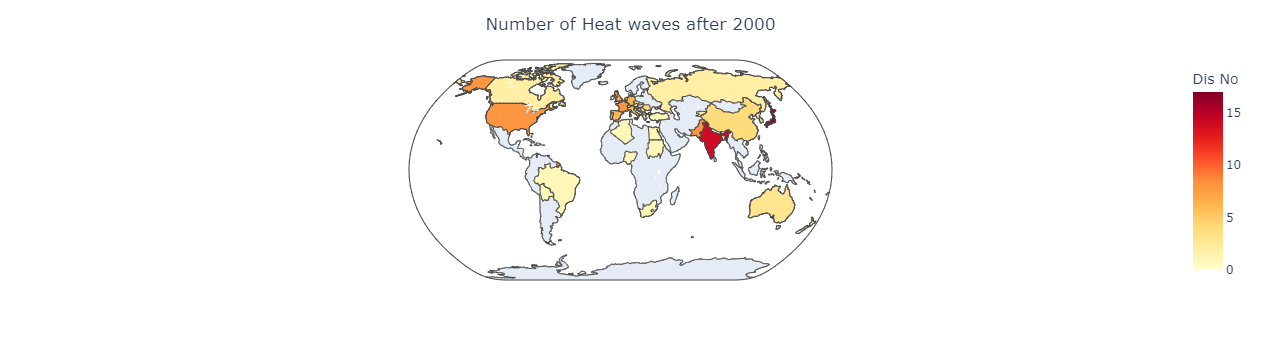

In [18]:
mapping(subtype='Heat wave')

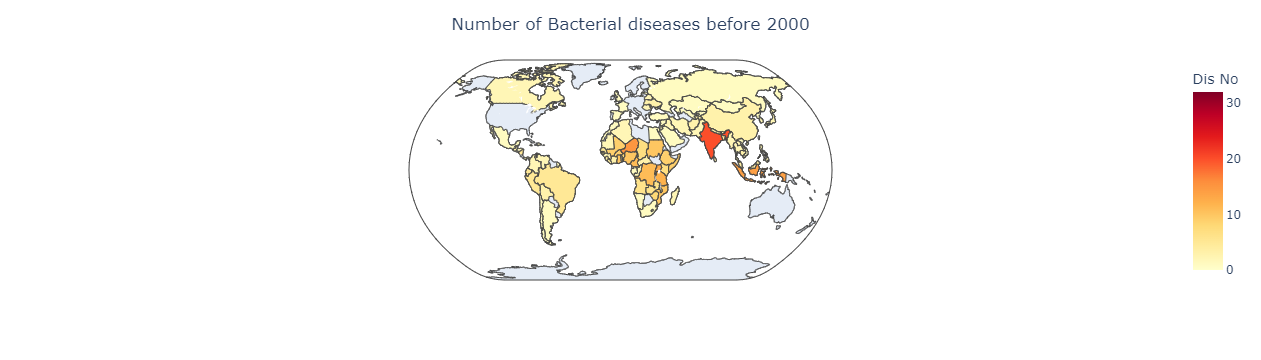

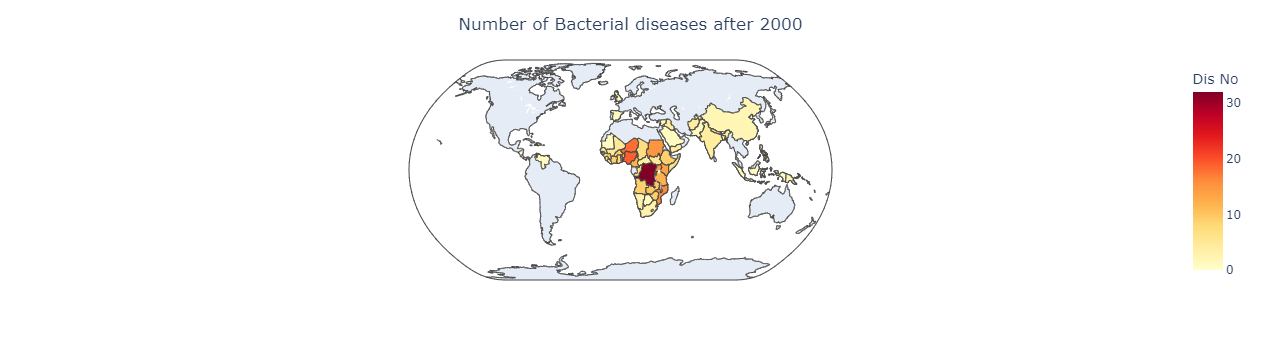

In [19]:
mapping(subtype='Bacterial disease')

In most cases it is visible that we have more frequence after 2000. One interesting odservation is that bacterial diseases were extinct in most of the world except in africa that it becomes more and more frequent. That was a first indicator about the corellation between the significance of some natural disasters and  the financial situation of a country.

# Affected poeple

## Total Deaths

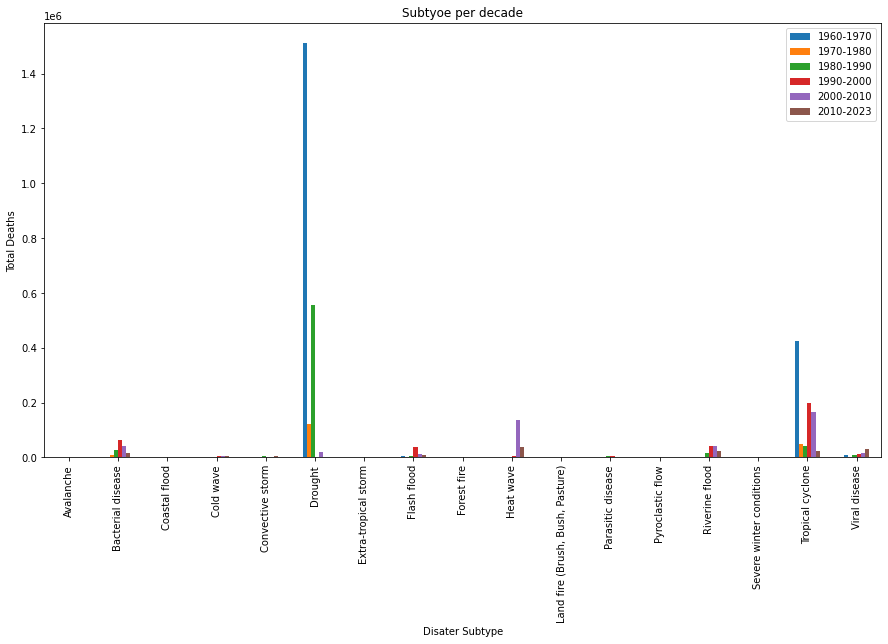

In [20]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('Subtyoe per decade')
plt.xlabel('Disater Subtype')
plt.ylabel('Total Deaths')
plt.show()

It seems that even though the frequency of the disasters is increased they are becoming less deadly. However the drought are deadlier but also we cannot be sure about the consistency of the data. 

In [21]:

"""
fig = px.choropleth(data_frame=df_merged,
                    locations="ISO",
                    scope='world',
                    color='Total Affected',
                    hover_name="ISO",
                    color_continuous_scale = 'YlOrRd',
                    projection="natural earth",
                    range_color=[0, Affected_World],
                    title="GDP per Capita by Country")

fig.show()

"""

'\nfig = px.choropleth(data_frame=df_merged,\n                    locations="ISO",\n                    scope=\'world\',\n                    color=\'Total Affected\',\n                    hover_name="ISO",\n                    color_continuous_scale = \'YlOrRd\',\n                    projection="natural earth",\n                    range_color=[0, Affected_World],\n                    title="GDP per Capita by Country")\n\nfig.show()\n\n'

### Total Affected

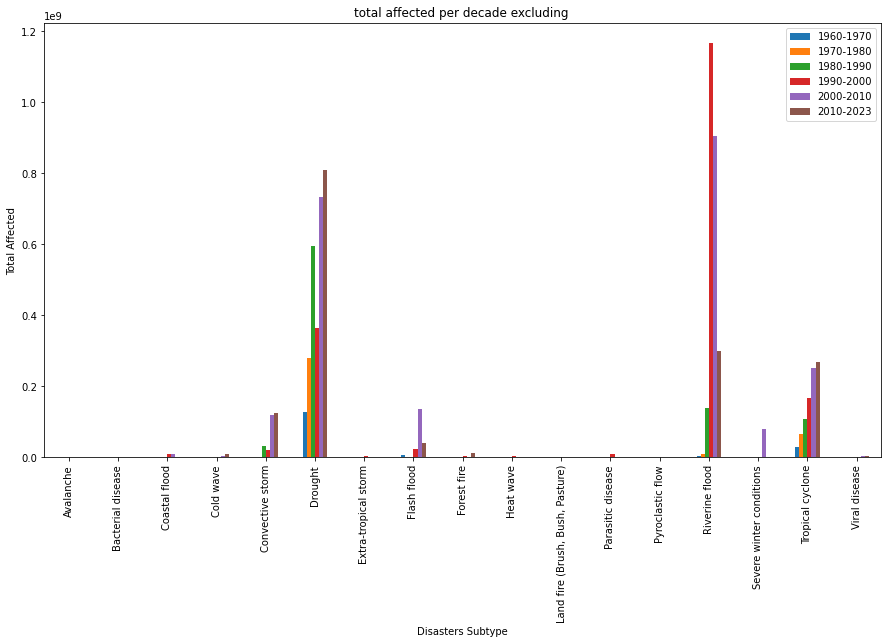

In [22]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('total affected per decade excluding ')
plt.xlabel('Disasters Subtype')
plt.ylabel('Total Affected')
plt.show()


In [23]:
Affected_World= Natural_Disasters.groupby(['ISO'])['Total Affected'].sum().reset_index()
Affected_World['ISO']=Affected_World['ISO'].astype('str')

In [24]:

"""
data = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
})
"""
# get the 'B' column as a NumPy array


print(Affected_World['ISO'])

maximum = Affected_World.max()



fig = px.choropleth(Affected_World , locations='ISO', color='Total Affected',
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, Affected_World.max()])
    
        
fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's after 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
    
fig.show()


0      AFG
1      AGO
2      AIA
3      ALB
4      ANT
      ... 
223    YMN
224    YUG
225    ZAF
226    ZMB
227    ZWE
Name: ISO, Length: 228, dtype: object


ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'cmax' property of layout.coloraxis
        Received value: ISO                        ZWE
Total Affected    3240499870.0
dtype: object

    The 'cmax' property is a number and may be specified as:
      - An int or float

It seems agian that droughts and Riverine floods are the two natural disasters that are afffecting more pople even though that the are not that deadly as in the past. Therefore, we have considered to work with riverine floods. However, there riverine floods have some geographical dependency. Then we have checked the geo data that the dataset had. We had geolocation data but only from some date onwards. Also we had only name but not longtitudes and latitudes.Also sometimes the geolocations were not consistent. Sometimes they were areas some other states some other towns or cities. Furtheremore, reverine floods as their name indicates are depending on close riveres wihich is geographicaly dependent. We have considered that financial factor are affecting more the population during a drought. At last riverine floods are affecting poeple in a decreasing way the last three decades in contrast with droughts.

In [ ]:
"""
mask = Natural_Disasters.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""

We have concluded that we will use The total affected, region, year, and iso combined with financial data.

### Interactive visualizations

Creating a bokeh barblots in a decade division of time for the six natural disaster subtypes that visualy seem that are afffecting the most poeple.

In [25]:
Disaster_Country_Affected= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum()

In [26]:
Disaster_Country_Affected_Year_ind= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum().reset_index()

# Chosing only the natural disasters that we are more interested.
chosen_categories = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
filtered_df = Disaster_Country_Affected_Year_ind[Disaster_Country_Affected_Year_ind['Disaster Subtype'].isin(chosen_categories)]
# Assigning each year to a time period by creating a time period column
filtered_df['Time period'] = '0'
filtered_df.loc[filtered_df['Year']<=1910,'Time period'] = '1900-1910'
filtered_df.loc[(filtered_df['Year']>1910)&(filtered_df['Year']<=1920),'Time period'] = '1910-1920'
filtered_df.loc[(filtered_df['Year']>1920)&(filtered_df['Year']<=1930),'Time period'] = '1920-1930'
filtered_df.loc[(filtered_df['Year']>1930)&(filtered_df['Year']<=1940),'Time period'] = '1930-1940'
filtered_df.loc[(filtered_df['Year']>1940)&(filtered_df['Year']<=1950),'Time period'] = '1940-1950'
filtered_df.loc[(filtered_df['Year']>1950)&(filtered_df['Year']<=1960),'Time period'] = '1950-1960'
filtered_df.loc[(filtered_df['Year']>1960)&(filtered_df['Year']<=1970),'Time period'] = '1960-1970'
filtered_df.loc[(filtered_df['Year']>1970)&(filtered_df['Year']<=1980),'Time period'] = '1970-1980'
filtered_df.loc[(filtered_df['Year']>1980)&(filtered_df['Year']<=1990),'Time period'] = '1980-1990'
filtered_df.loc[(filtered_df['Year']>1990)&(filtered_df['Year']<=2000),'Time period'] = '1990-2000'
filtered_df.loc[(filtered_df['Year']>2000)&(filtered_df['Year']<=2010),'Time period'] = '2000-2010'
filtered_df.loc[(filtered_df['Year']>2010),'Time period'] = '2010<'
# Summing in regards to time period
Disaters_per_period = filtered_df.groupby(['Disaster Subtype','Time period'])['Total Affected'].sum().reset_index()
Affected_Disaster = Disaters_per_period.pivot(index='Time period', columns='Disaster Subtype', values='Total Affected')
Affected_Disaster = Affected_Disaster.fillna(0)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

C:\Users\asmun\AppData\Local\Temp\ipykernel_37140\2247632396.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
from scipy import stats
from bokeh.models import FactorRange,ColumnDataSource, Dropdown
from bokeh.plotting import figure, show

#Affected_Disaster = Affected_Disaster / Affected_Disaster.max()
Decades = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010<']
disaster = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
source = ColumnDataSource(Affected_Disaster)
p = figure(title='Number of affected poeple per rime period',x_axis_label='decade',y_axis_label='#Affected', plot_width=1200, plot_height=800,x_range = FactorRange(factors=Decades)) 

In [28]:
len(disaster)
colorcrime = ['yellow','red','blue','green','purple','brown','#00ffff','#66ff66','#9933ff','#ff0080','#99ccff','#669900','#ff6600','#660033']

In [29]:
bar ={} # to store vbars
### here we will do a for loop:

items = [] ### for the custom legend // you need to figure out where to add it

for indx,i in enumerate(disaster):
    bar[i] = p.vbar(x='Time period',  top=i, source= Affected_Disaster, 
                     fill_color=colorcrime[indx], line_color='black', fill_alpha=0.3,
                    ### we will create a vbar for each focuscrime
                      muted_alpha=0, muted =  False if i == "Drought"else True) 
    items.append((i, [bar[i]])) ### figure where to add it
print(bar)
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

{'Drought': GlyphRenderer(id='1040', ...), 'Riverine flood': GlyphRenderer(id='1047', ...), 'Tropical cyclone': GlyphRenderer(id='1054', ...), 'Flash flood': GlyphRenderer(id='1061', ...), 'Convective storm': GlyphRenderer(id='1068', ...), 'Severe winter conditions': GlyphRenderer(id='1075', ...), 'Forest fire': GlyphRenderer(id='1082', ...)}


In [30]:
from bokeh.models import Legend

legend = Legend(items=items, location=(0, 400))

In [31]:
from bokeh.plotting import output_file
from bokeh.plotting import figure, show, save



p.add_layout(legend, 'right')
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'

show(p) #displays your plot

# Save the plot as an HTML file
p = figure(width=1600, height=600)


from bokeh.resources import CDN



In [32]:
from bokeh.plotting import figure, show, save

# Create a figure for displaying the plot
p = figure(width=800, height=600)

# Add your plot elements

# Display your plot
show(p)

# Create a new figure for saving the plot
save_figure = figure(width=1600, height=600)

# Add the same plot elements to the new figure

# Save the plot as an HTML file
save(save_figure, "Incidents_interactive_barplot.html")

C:\Users\asmun\anaconda3\lib\site-packages\bokeh\io\saving.py:142: UserWarning:

save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN

C:\Users\asmun\anaconda3\lib\site-packages\bokeh\io\saving.py:154: UserWarning:

save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'



'C:\\Users\\asmun\\1 DTU\\Social data analysis and visualization\\Social_data_analysis_and_visualization\\Incidents_interactive_barplot.html'

In [33]:
Disaster_Country_Affected_Year_ind= Natural_Disasters[['Disaster Subtype','Year']].value_counts().reset_index()
Disaster_Country_Affected_Year_ind['Incidents No']= Disaster_Country_Affected_Year_ind[0]
print(Disaster_Country_Affected_Year_ind)

    Disaster Subtype  Year    0  Incidents No
0     Riverine flood  2006  175           175
1     Riverine flood  2007  164           164
2     Riverine flood  2010  160           160
3     Riverine flood  2005  145           145
4     Riverine flood  2013  138           138
..               ...   ...  ...           ...
857        Heat wave  1973    1             1
858        Heat wave  1965    1             1
859        Heat wave  1962    1             1
860        Heat wave  1958    1             1
861      Forest fire  1978    1             1

[862 rows x 4 columns]


In [34]:

# Chosing only the natural disasters that we are more interested.
chosen_categories = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
filtered_df = Disaster_Country_Affected_Year_ind[Disaster_Country_Affected_Year_ind['Disaster Subtype'].isin(chosen_categories)]
# Assigning each year to a time period by creating a time period column
filtered_df['Time period'] = '0'
filtered_df.loc[filtered_df['Year']<=1910,'Time period'] = '1900-1910'
filtered_df.loc[(filtered_df['Year']>1910)&(filtered_df['Year']<=1920),'Time period'] = '1910-1920'
filtered_df.loc[(filtered_df['Year']>1920)&(filtered_df['Year']<=1930),'Time period'] = '1920-1930'
filtered_df.loc[(filtered_df['Year']>1930)&(filtered_df['Year']<=1940),'Time period'] = '1930-1940'
filtered_df.loc[(filtered_df['Year']>1940)&(filtered_df['Year']<=1950),'Time period'] = '1940-1950'
filtered_df.loc[(filtered_df['Year']>1950)&(filtered_df['Year']<=1960),'Time period'] = '1950-1960'
filtered_df.loc[(filtered_df['Year']>1960)&(filtered_df['Year']<=1970),'Time period'] = '1960-1970'
filtered_df.loc[(filtered_df['Year']>1970)&(filtered_df['Year']<=1980),'Time period'] = '1970-1980'
filtered_df.loc[(filtered_df['Year']>1980)&(filtered_df['Year']<=1990),'Time period'] = '1980-1990'
filtered_df.loc[(filtered_df['Year']>1990)&(filtered_df['Year']<=2000),'Time period'] = '1990-2000'
filtered_df.loc[(filtered_df['Year']>2000)&(filtered_df['Year']<=2010),'Time period'] = '2000-2010'
filtered_df.loc[(filtered_df['Year']>2010),'Time period'] = '2010<'
print(filtered_df)
# Summing in regards to time period
Disaters_per_period = filtered_df.groupby(['Disaster Subtype','Time period'])['Incidents No'].sum().reset_index()
Affected_Disaster = Disaters_per_period.pivot(index='Time period', columns='Disaster Subtype', values='Incidents No')
Affected_Disaster = Affected_Disaster.fillna(0)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

    Disaster Subtype  Year    0  Incidents No Time period
0     Riverine flood  2006  175           175   2000-2010
1     Riverine flood  2007  164           164   2000-2010
2     Riverine flood  2010  160           160   2000-2010
3     Riverine flood  2005  145           145   2000-2010
4     Riverine flood  2013  138           138       2010<
..               ...   ...  ...           ...         ...
836      Flash flood  1968    1             1   1960-1970
837      Flash flood  1965    1             1   1960-1970
838      Forest fire  2012    1             1       2010<
839      Forest fire  2014    1             1       2010<
861      Forest fire  1978    1             1   1970-1980

[467 rows x 5 columns]


C:\Users\asmun\AppData\Local\Temp\ipykernel_37140\882674820.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
Decades = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010<']
disaster = ["Drought", "Riverine flood","Tropical cyclone", "Flash flood", "Convective storm", "Severe winter conditions","Forest fire"]
source = ColumnDataSource(Affected_Disaster)
p = figure(title='Number of affected poeple per rime period',x_axis_label='decade',y_axis_label='#Affected', plot_width=1200, plot_height=800,x_range = FactorRange(factors=Decades)) 

In [36]:
len(disaster)
colorcrime = ['yellow','red','blue','green','purple','brown','#00ffff','#66ff66','#9933ff','#ff0080','#99ccff','#669900','#ff6600','#660033']

In [37]:
bar ={} # to store vbars
### here we will do a for loop:

items = [] ### for the custom legend // you need to figure out where to add it

for indx,i in enumerate(disaster):
    bar[i] = p.vbar(x='Time period',  top=i, source= Affected_Disaster, 
                     fill_color=colorcrime[indx], line_color='black', fill_alpha=0.3,
                    ### we will create a vbar for each focuscrime
                      muted_alpha=0, muted =  False if (i == "Drought") or (i == "Tropical cyclone") else True) 
    items.append((i, [bar[i]])) ### figure where to add it
print(bar)
#i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
#read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)

{'Drought': GlyphRenderer(id='1746', ...), 'Riverine flood': GlyphRenderer(id='1753', ...), 'Tropical cyclone': GlyphRenderer(id='1760', ...), 'Flash flood': GlyphRenderer(id='1767', ...), 'Convective storm': GlyphRenderer(id='1774', ...), 'Severe winter conditions': GlyphRenderer(id='1781', ...), 'Forest fire': GlyphRenderer(id='1788', ...)}


In [38]:
legend = Legend(items=items, location=(0, 400))

In [39]:

p.add_layout(legend, 'right')
p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
show(p) #displays your plot


output_file('Incidents_interacrive_barplot_1.html')

### Creating interacive maps 

creating interactive maps that have the cumulative sum of affected poeple before and after a chose year by using a seperate slider.

In [40]:
Disaster_Country_Affected_Year_indexed= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum().reset_index()

Disaster_Country_Affected_Year_indexed = Disaster_Country_Affected_Year_indexed[(Disaster_Country_Affected_Year_indexed['Disaster Subtype']=='Heat wave')|(Disaster_Country_Affected_Year_indexed['Disaster Subtype']=='Drought')]
Disaster_Country_Affected_Year_indexed= Disaster_Country_Affected_Year_indexed.groupby(['ISO','Year'])['Total Affected'].sum().reset_index()

In [41]:

# get the full range of years
year_range = pd.date_range(str(1900), str(2023), freq='YS').year

# create a new dataframe with all category-year combinations
new_df = pd.DataFrame({'ISO': [], 'Year': []})
for ISO in Disaster_Country_Affected_Year_indexed['ISO'].unique():
    category_df = pd.DataFrame({'ISO': [ISO ] * len(year_range), 'Year': year_range})
    new_df = pd.concat([new_df, category_df])

# merge the new dataframe with the original dataframe
df_merged = pd.merge(new_df, Disaster_Country_Affected_Year_indexed, on=['ISO', 'Year'], how='left')

# sort the merged dataframe
df_merged = df_merged.sort_values(['ISO', 'Year'])

df_merged['Year'] = df_merged['Year'].astype(int)

In [42]:
df_merged=df_merged.fillna(0)
df_merged['Before'] = df_merged.groupby('ISO')['Total Affected'].cumsum()

In [43]:
df_merged

ISO  Year  Total Affected         Before
0      AFG  1900         0.00000        0.00000
1      AFG  1901         0.00000        0.00000
2      AFG  1902         0.00000        0.00000
3      AFG  1903         0.00000        0.00000
4      AFG  1904         0.00000        0.00000
...    ...   ...             ...            ...
20083  ZWE  2019         0.00000 26022618.00000
20084  ZWE  2020         0.00000 26022618.00000
20085  ZWE  2021    167500.00000 26190118.00000
20086  ZWE  2022         0.00000 26190118.00000
20087  ZWE  2023         0.00000 26190118.00000

[20088 rows x 4 columns]

In [44]:
pd.set_option('display.max_rows', None)

max_values = df_merged.groupby('ISO')['Before'].transform(max)

# Create a new column with the difference between each value and the maximum for its category
df_merged['After'] = max_values - df_merged['Before']

# Display the updated DataFrame



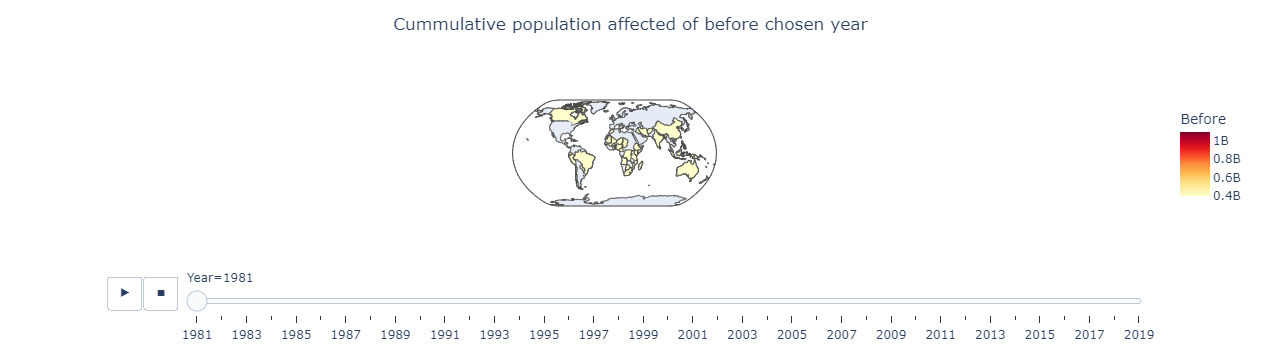

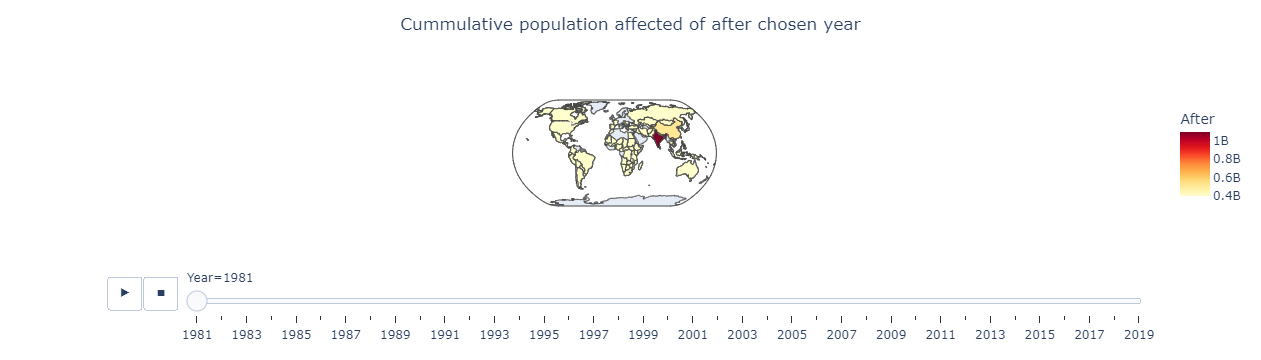

In [45]:

df_merged[df_merged == 0] = np.nan

df_used=df_merged[(df_merged['Year']>1980)&(df_merged['Year']<2020)]

fig = px.choropleth(data_frame=df_used,
                    locations="ISO",
                    scope='world',
                    color="Before",
                    hover_name="ISO",
                    color_continuous_scale = 'YlOrRd',
                    animation_frame="Year",
                    projection="natural earth",
                    range_color=[400000000, df_used['After'].max()],
                    title="GDP per Capita by Country")

fig.update_layout(
title={
     'text': 'Cummulative population affected of before chosen year',
     'y':0.95,
     'x':0.5,
     'xanchor': 'center',
     'yanchor': 'top'
}
)

# Show the figure
fig.show()

fig.write_html("Map_before.html")

fig = px.choropleth(data_frame=df_used,
                    locations="ISO",
                    scope='world',
                    color="After",
                    hover_name="ISO",
                    color_continuous_scale = 'YlOrRd',
                    animation_frame="Year",
                    projection="natural earth",
                    range_color=[400000000, df_used['After'].max()],
                    title="GDP per Capita by Country")

fig.update_layout(
title={
     'text': 'Cummulative population affected of after chosen year',
     'y':0.95,
     'x':0.5,
     'xanchor': 'center',
     'yanchor': 'top'
}
)

# Show the figure
fig.show()

fig.write_html("Map_after.html")

### Combining the Natural Disaster Dataset with Financial data and energy consumption data.

We have decided that is is important to limit out analysis to the last trhee decades so from 1990.

In [46]:

Natural_Disasters_Subtype = Natural_Disasters[(Natural_Disasters['Disaster Subtype']=='Drought')|(Natural_Disasters['Disaster Subtype']=='Heat wave')]
Natural_Disasters_Subtype_After_1990 =Natural_Disasters_Subtype[Natural_Disasters_Subtype['Year']>1990]
Natural_Disasters_Scope = Natural_Disasters_Subtype_After_1990[["Dis No",'Year','Disaster Subtype','Country', 'ISO', 'Region', 'Continent', 'Total Deaths',
        'No Injured', 'No Affected', 'No Homeless', 'Total Affected',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"]]

There are lines to the dataset that have number of deaths and number of affected but nottotal affected. We have decide to get the sum of the lines in order to have more data to work with.

In [47]:
Natural_Temp = Natural_Disasters_Scope
Temp1 = Natural_Disasters_Scope

# creates a new line that has the sum of 'Total Deaths','No Injured', 'No Homeless' if total affected is null
Temp1['New Affected'] = Temp1.loc[ Temp1['Total Affected'].isnull(),[ 'Total Deaths','No Injured', 'No Homeless']].sum(axis=1)
# convert zero values to nan
Temp1.loc[Temp1['New Affected'] <= 0, 'New Affected'] = np.nan
# fill total affected nan values with new affected values
Temp1.loc[Temp1['Total Affected'].isnull(), 'Total Affected'] = Temp1.loc[Temp1['Total Affected'].isnull(), 'New Affected']


C:\Users\asmun\AppData\Local\Temp\ipykernel_37140\1871077039.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
Temp1 = Temp1.drop(['New Affected','No Injured','No Homeless',"Total Damages ('000 US$)","Reconstruction Costs ('000 US$)"], axis=1)

Natural_Disasters_Scope = Temp1

instances = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Dis No'].count().reset_index()

Total_affected = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Affected'].sum().reset_index()

Total_deaths = Natural_Disasters_Scope.groupby(['ISO','Year','Disaster Subtype', 'Region', 'Continent'])['Total Deaths'].sum().reset_index()
Natural_Disasters_Scope =  pd.merge(instances,Total_deaths, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])
Natural_Disasters_Scope =  pd.merge(Natural_Disasters_Scope,Total_affected, on =['ISO','Year','Disaster Subtype', 'Region', 'Continent'])

filtr = Natural_Disasters_Scope['ISO'].unique()


### importing energy consumption dataset

In [49]:
energy_consumption = pd.read_csv('primary-energy-cons.xls')
energy_consumption = energy_consumption[energy_consumption['Year']>1990 ] 
energy_consumption['ISO']=energy_consumption['Code']

In [50]:
GDP_absolut = pd.read_excel('GDP_absolut.xls')

### Importing the rest of the datasets

We have created a function to automate the extraction and the manipulation of the world bank odtain such a way that it will be easy to merge them with the natural disasters dataand the enexrgy consumption one. 

In [51]:
def data_clean(name = 'GDP_per_capita'):

    GDP_per_capita_raw = pd.read_excel(name + '.xls')
    GDP_per_capita_raw.drop(['Unnamed: 2','Unnamed: 3',], axis='columns', inplace=True)
    GDP_per_capita_raw.drop([0,1], axis='rows', inplace=True)
    GDP_per_capita_renamed = GDP_per_capita_raw
    GDP_per_capita_renamed.columns = GDP_per_capita_renamed.iloc[0]
    GDP_per_capita_renamed.drop([2], axis='rows', inplace=True)
    GDP_per_capita = GDP_per_capita_renamed.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name=name)
    GDP_per_capita['Year'] = GDP_per_capita['Year'].astype(int)
    final = GDP_per_capita[GDP_per_capita["Year"]>1990]
    return final

In [52]:
GDP_per_capita = data_clean(name = 'GDP_per_capita')
GDP_absolut = data_clean(name = 'GDP_absolut')
GDP_agriculture = data_clean(name = 'GDP_agriculture')
GDP_exports = data_clean(name = 'GDP_exports')
GDP_industry = data_clean(name = 'GDP_industry')
Imports_percent_GDP = data_clean(name = 'Imports_percent_GDP')
Cerial_Yields = data_clean(name = 'Cerial_Yields')
Annua_freshwater_withdrawal_total = data_clean(name = 'Annua_freshwater_withdrawal_total')
Agriculture_irrigated_Land = data_clean(name = 'Agriculture_irrigated_Land')
Agricultural_Land = data_clean(name = 'Agricultural_Land')
Arable_Land_Percentage = data_clean(name = 'Arable_Land_Percentage')
income_1_of_the_highest_fifth = data_clean(name = 'income_1_of_the_highest_20%')
income_2_of_the_second_fifth = data_clean(name = 'income_2_of_the_second_20%')
income_3_of_the_third_fifth = data_clean(name = 'income_3_of_the_third_20%')
income_4_of_the_fourth_fifth = data_clean(name = 'income_4_of_the_fourth_20%')
income_5_of_the_lowest_fifth = data_clean(name = 'income_5_of_the_lowest_20%')
Poverty_headcount_ratio = data_clean(name = 'Poverty_headcount_ratio')

# meging the data together
Financial_Dataset = pd.merge(GDP_per_capita,Cerial_Yields, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_absolut, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_agriculture, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_exports, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,GDP_industry, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Imports_percent_GDP, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Annua_freshwater_withdrawal_total, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agriculture_irrigated_Land, on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Agricultural_Land , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Arable_Land_Percentage , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_1_of_the_highest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_2_of_the_second_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_3_of_the_third_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_4_of_the_fourth_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,income_5_of_the_lowest_fifth , on =['Country Name','Country Code','Year'])
Financial_Dataset = pd.merge(Financial_Dataset,Poverty_headcount_ratio , on =['Country Name','Country Code','Year'])



Then we want to filter the data of the world bank in such a way that we get only data from countries that are included in the data we have from the previously created dataframe ( Natural_Disasters_Scope ) which has data of droughts and heat waves after l990. We achieve that with the following code.

In [53]:
filtr = Natural_Disasters_Scope['ISO'].unique()
Financial_Dataset = Financial_Dataset.loc[Financial_Dataset['Country Code'].isin(filtr)]

Then we have checked the nul values in that dataframe.

In [54]:
"""
FD = Financial_Dataset
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""


"\nFD = Financial_Dataset\nmask = FD.isnull()\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

it seems that data regarding irrigated land are not good and should be excluded. Also the data that have to do with difference in income and poverty are not so consistent so we need to see if we will include them or not. 

The we have erged the two dataframes

In [55]:
# Creating a renamed column that hase the name 'ISO' in order to make is easier to merge with NAtural Disasters
Financial_Dataset['ISO']= Financial_Dataset['Country Code']
Temp_matrix = pd.merge(Financial_Dataset,Natural_Disasters_Scope, on =['ISO','Year'])
Temp_matrix = Temp_matrix.replace(0,np.nan)

Then we have checked again using heatmap the misssing data ratio

In [56]:
"""
FD = Temp_matrix
mask = FD.isnull()


plt.figure(figsize=(15, 20))


# Create a heatmap of missing values
sns.heatmap(mask, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()
"""

"\nFD = Temp_matrix\nmask = FD.isnull()\n\n\nplt.figure(figsize=(15, 20))\n\n\n# Create a heatmap of missing values\nsns.heatmap(mask, cmap='viridis', cbar=False)\nplt.title('Missing Values Heatmap')\nplt.show()\n"

Then we have dropped the Aggriculture irigated land and counted the lines with not nan values like that or after we have removed the poverty data, the Total Deaths data, and the insome data.

In [57]:
Death_dataset = Temp_matrix.drop(['Agriculture_irrigated_Land'], axis=1)
Death_dataset = Death_dataset.dropna()
len(Death_dataset)


71

In [58]:
Death_dataset_Ex_Poverty = Temp_matrix.drop(['Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Death_dataset_Ex_Poverty = Death_dataset_Ex_Poverty.dropna()
len(Death_dataset_Ex_Poverty)

82

It seems that by including irrigated Land and Poverty colymns we have a very small dataset so we have decided to exclude these two columns.

In [59]:
Affected_dataset = Temp_matrix.drop(["Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)


In [60]:
len(Affected_dataset)

635

In [61]:
"""
Instances = Temp_matrix.drop(["Total Affected","Total Deaths",'Agriculture_irrigated_Land','Poverty_headcount_ratio'], axis=1)
Instances = Instances.dropna()
len(Instances)
"""

'\nInstances = Temp_matrix.drop(["Total Affected","Total Deaths",\'Agriculture_irrigated_Land\',\'Poverty_headcount_ratio\'], axis=1)\nInstances = Instances.dropna()\nlen(Instances)\n'

It seems that more data could be excluded but we have considered that 217 lines were good enough to work with but if could not create a good enough prediction model we could check if by excluding also the income data we could get a better accuracy

## Analysis on Affected dataset

In [62]:
Affected_dataset['Population'] = Affected_dataset['GDP_absolut']/Affected_dataset['GDP_per_capita']
Affected_dataset['Total Affected normalized'] = Affected_dataset['Total Affected']/Affected_dataset['Population']

Creating region data that correspond to contintents

In [63]:
Affected_dataset.loc[Affected_dataset['Region']=='Southern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Africa','Region'] ='Africa'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='South-Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='South America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Southern America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Northern America','Region'] ='Northern America'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Western Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Eastern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Central Asia','Region'] ='Asia'
Affected_dataset.loc[Affected_dataset['Region']=='Central America','Region'] ='South America'
Affected_dataset.loc[Affected_dataset['Region']=='Western Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Northern Europe','Region'] ='Europe'
Affected_dataset.loc[Affected_dataset['Region']=='Southern Africa','Region'] ='Africa'

creatilng the colouring of these regions. Green for Asia, blue for Africa red for North America, Purple for latin/south America yellow for Europe Orange for Australia and New Zealand

In [64]:

colours = {'Asia' : 'green', 'Africa':'blue', 'Northern America': 'red', 'South America':'purple', 'Europe':'yellow','Australia and New Zealand':'orange'}
clrs = ['green','blue', 'red', 'purple', 'yellow','orange']

In [65]:

Affected_dataset_messy = Affected_dataset
Affected_dataset = Affected_dataset.dropna()

Check how many distinct rows we have per country after the combination and cleansing.

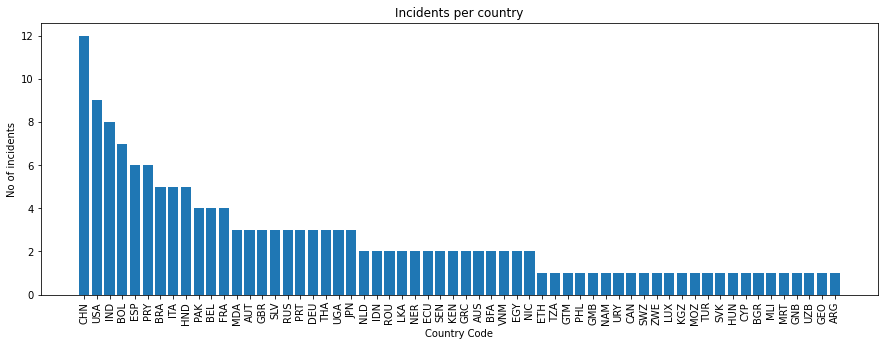

In [66]:
Countries = Affected_dataset['ISO'].value_counts()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Incidents per country')
plt.xlabel('Country Code')
plt.ylabel('No of incidents')

plt.show()

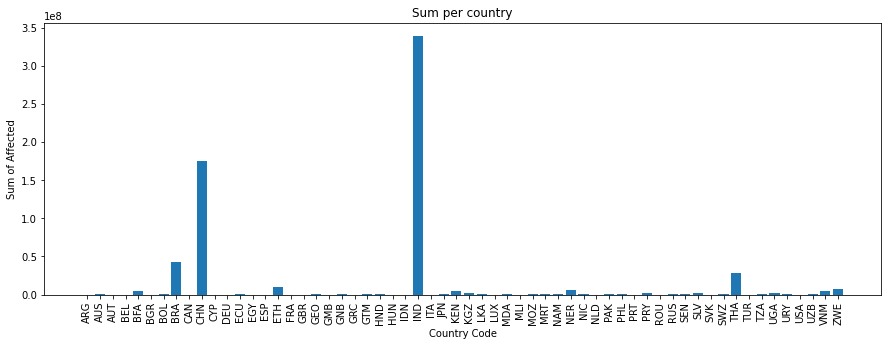

In [67]:
Countries = Affected_dataset.groupby('ISO')['Total Affected'].sum()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Sum per country')
plt.xlabel('Country Code')
plt.ylabel('Sum of Affected')

plt.show()

It seems that by beacause of their population china and India have more affected poeple such that they might be outliers. However, we have a normalized version oth the number of affected poeple divided by the poplutaion. In the 

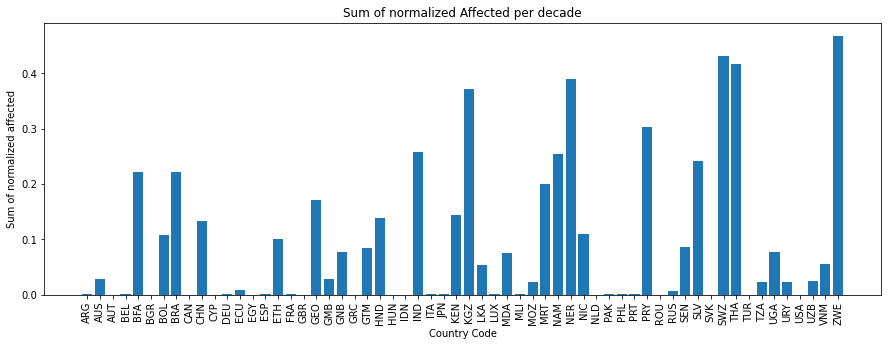

In [68]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].sum()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Sum of normalized Affected per decade')
plt.xlabel('Country Code')
plt.ylabel('Sum of normalized affected')

plt.show()

the above is the sum of the normalized versions. However it might be more appropriate to get the mean of the affected poeple per incident.

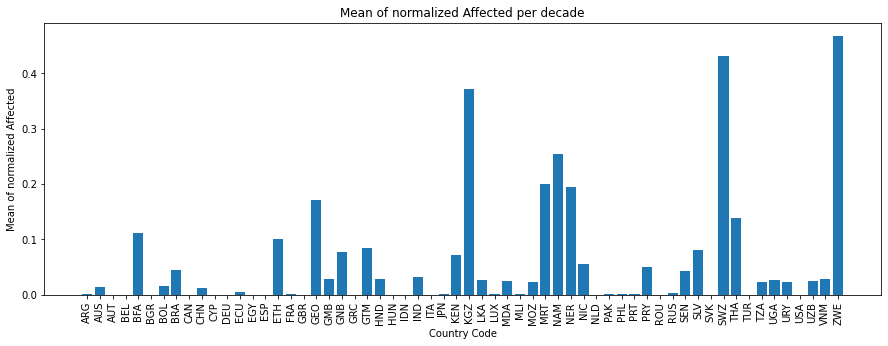

In [69]:
Countries = Affected_dataset.groupby('ISO')['Total Affected normalized'].mean()
plt.figure(figsize=(15,5))

plt.bar(Countries.index,Countries.values)
plt.xticks( rotation=90)
plt.title('Mean of normalized Affected per decade')
plt.xlabel('Country Code')
plt.ylabel('Mean of normalized Affected')

plt.show()

# Here Goes Asis work!!! 